# **PROGRAMMING ASSIGNMENT 2**

# *Question 1 . Power*

Verify that the mean of power is centered around the variance of the voltage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

In [2]:

N_samples = 100000
voltage = np.random.normal(loc=0.0, scale=2.0, size=N_samples)

#let r=1
power = voltage**2
mean_power = np.mean(power)
var_voltage = np.var(voltage)
print(f"Variance of Voltage:{var_voltage:.4f}")
print(f"Mean of Power:      {mean_power:.4f}")
print(f"Difference:         {abs(mean_power - var_voltage):.4f}")

Variance of Voltage:4.0072
Mean of Power:      4.0072
Difference:         0.0000


We generate a random Gaussian voltage signal with 0 mean. We know :
V(x) = E(x^2)-[E(x)]^2
Since E(x)=0, this leaves Variance = E(x^2). Since Power is proportional to the square of voltage (V^2), the expected value (mean) of the power is mathematically identical to the variance of the voltage. The simulation results confirm this, with the two values matching closely (within statistical error).

The code begins with simulating a random gaussian voltage signal. We then determine the mean and variance and explicitly show their difference.

# *Question 2. RMS*

Consider cases of different RMS and plot their histograms.

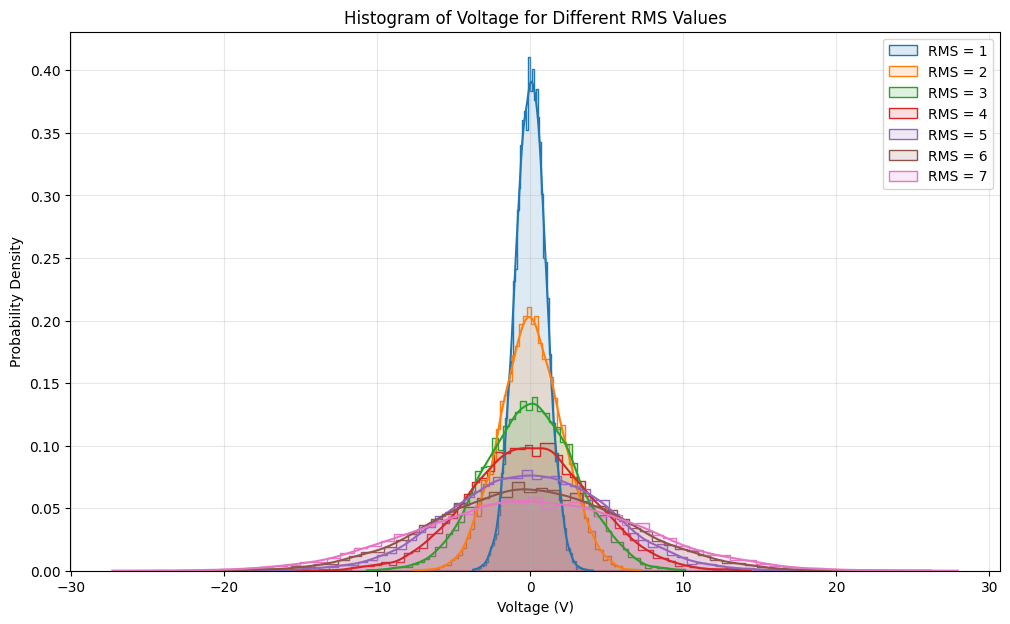

In [12]:
rms_values = [1, 2, 3, 4, 5, 6, 7]
plt.figure(figsize=(12, 7))
for rms in rms_values:
    v_signal = np.random.normal(loc=0, scale=rms, size=10000)
    sns.histplot(v_signal, label=f'RMS = {rms}', kde=True,
                 stat="density", element="step", alpha=0.15)

plt.title('Histogram of Voltage for Different RMS Values')
plt.xlabel('Voltage (V)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

RMS corresponds to the standard deviation (STD) of the signal distribution (we assume zero mean). As we increase the RMS value, the variance increases, while the sharpness of peak decreases. In the histogram plots, we observe that signals with low RMS (e.g., RMS=1) have a narrow, tall Bell curve centered at zero. As RMS increases (e.g., RMS=5), the curve flattens and spreads out significantly, indicating a higher probability of observing extreme voltage values. This corresponds to increasing variability as STD values increase.

The code starts by considering a list of different STD values, and plotting corresponding gaussians in histogram format to highlight the variation.

# *Question 3. Sine wave addition*

How will the histogram change if I add a slowly varying sine wave in it.

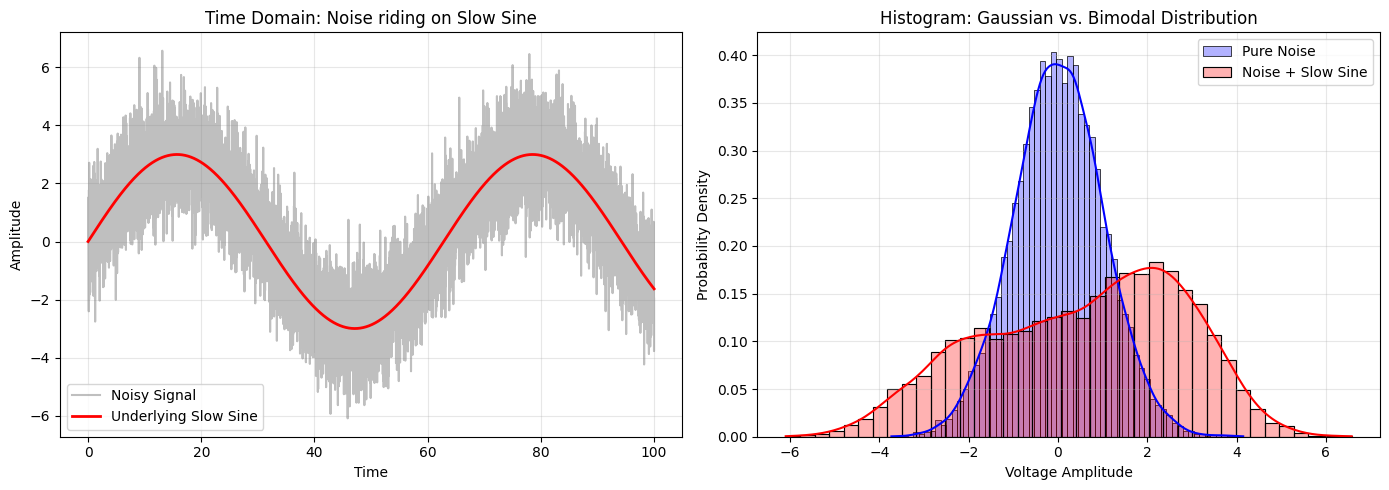

In [14]:
N = 10000
t = np.linspace(0, 100, N)

slow_sine = 3 * np.sin(0.1 * t)
noise = np.random.normal(loc=0, scale=1, size=N)
combined_signal = noise + slow_sine
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot A: Time Domain (Visualizing "Slowly Varying")
axes[0].plot(t, combined_signal, color='gray', alpha=0.5, label='Noisy Signal')
axes[0].plot(t, slow_sine, color='red', linewidth=2, label='Underlying Slow Sine')
axes[0].set_title("Time Domain: Noise riding on Slow Sine")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Amplitude")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot B: Histogram (The Statistical Effect)
sns.histplot(noise, stat="density", color="blue", alpha=0.3, label="Pure Noise", kde=True, ax=axes[1])
sns.histplot(combined_signal, stat="density", color="red", alpha=0.3, label="Noise + Slow Sine", kde=True, ax=axes[1])
axes[1].set_title("Histogram: Gaussian vs. Bimodal Distribution")
axes[1].set_xlabel("Voltage Amplitude")
axes[1].set_ylabel("Probability Density")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

A pure Gaussian noise signal has a unimodal distribution (one peak at the center). A sine wave spends most of its time at its peaks and troughs, creating a 'bathtub' (bimodal) distribution. When we add a sine wave to the noise, the histogram spreads out. Instead of a single sharp peak at zero, the probability mass shifts toward the amplitude limits of the sine wave. The resulting distribution appears flattened, corresponding to the positive and negative peaks of the sine wave.

The code first computes the resultant waves in question. Following which, a simple plotting technique is followed to display each three waves interleaved upon one another. We explore plots corresponding to both the time domain (slow variation) and the statistical effect in the histogram.

# *Question 4. Ensemble Variances*

How are the Variances of the ensembles distributed ?

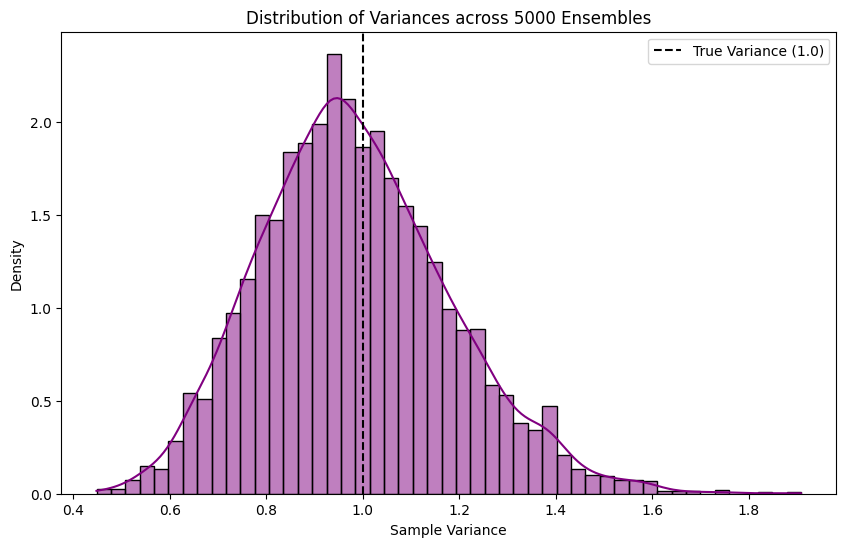

In [9]:
n_ensembles = 5000
samples_per_ensemble = 50
variances = []

for _ in range(n_ensembles):
    sample = np.random.normal(0, 1, samples_per_ensemble)
    variances.append(np.var(sample))

plt.figure(figsize=(10, 6))
sns.histplot(variances, stat="density", kde=True, color="purple")
plt.axvline(x=1.0, color='k', linestyle='--', label="True Variance (1.0)")
plt.title(f'Distribution of Variances across {n_ensembles} Ensembles')
plt.xlabel('Sample Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

We simulate 5000 ensembles (trials), calculating the sample variance for each. The histogram shows that the sample variances are not constant; they fluctuate around the true variance (1.0). The distribution is not perfectly symmetric; it is slightly skewed to the right. Theoretically, this follows a Scaled Chi-Squared distribution. This demonstrates that variance itself is a random variable when estimated from finite data.

Our code first simulates the required number of ensembles, followed by their erespective variance calculations. Finally the histogram of density of variances is plotted.

# **APPENDIX**

The assignment aims at studying the relations of statistical variables like mean and variance of randomly generated samples. We explore the effect of addition of probability fucntions and variation in:the distribution of ensemble variances.

In order to bring this code to fruition the following aids were used:

GEMINI AI - Gemini was used for proof-reading code-blocks and providing visually attractive disgram format.